# Ford GoBike Trip Data Exploratory Analysis

## by Aubrey Hansen-Barkun

## Preliminary Wrangling

The 'Ford GoBike Trip Data' dataset contains information about customer trips in 2017. 

In [230]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

In [231]:
df = pd.read_csv('../2017-fordgobike-tripdata.csv', parse_dates = ['start_time', 'end_time'])

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: datetime64[ns](2), float64(4), int64(4), object(3)
memory usage: 51.5+ MB


In [9]:
df.shape

(519700, 13)

In [10]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


### What is the structure of your dataset?

The dataset contains 519,700 observations of 13 features related to the time/duration of the trips, the location of the trip, and characteristics of the bike used and customer. The data is tidy and relatively clean - given that data cleaning is not the purpose of this exercise, the dataset will be used as provided.

### What is/are the main feature(s) of interest in your dataset?

The main questions of interest that will be explored are:
- What are the busiest stations?
- How long do trips typically last?
- Do trip durations differ by user type?
- What is the relationship between time of day and trip duration?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- `duration_sec`
- `user_type`
- `start_time`
- `start_station_name`
- `end_station_name`

## Univariate Exploration

#### The Duration Feature

##### Plots

Mean: 1099.0095208774294


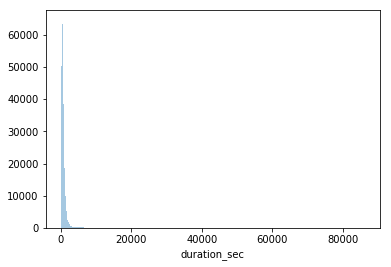

In [208]:
# Plotting the histogram of the natural units
bins_dura_reg = np.arange(1, df['duration_sec'].max(), 100)
sns.distplot(df['duration_sec'], bins=bins_dura_reg, kde=False);
print('Mean: {}'.format(df['duration_sec'].mean()))

Mean: 1099.0095208774294


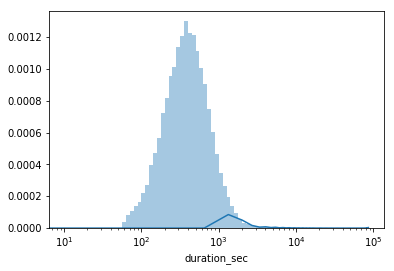

In [209]:
# Plotting the histogram with a log scale axis transformation
bins_dura_log = 10**np.arange(1, np.log10(df['duration_sec'].max()), 0.05)
sns.distplot(df['duration_sec'], bins=bins_dura_log, kde=True)
plt.xscale('log')
print('Mean: {}'.format(df['duration_sec'].mean()))

##### Observations

- The trip duration's natural units disribution is highly skewed to the right
- Following a log scale axis transformation, the distribution is roughly log-normally distributed around a mean of around 1099 seconds (or 18 minutes)
- Despite the log transformation, the distribution is still right-skewed as evidenced by the KDE which peaks to the right of the mode of the log distribution

Next, the `user_type` feature will be investigated.

#### The User Type Feature

##### Plots

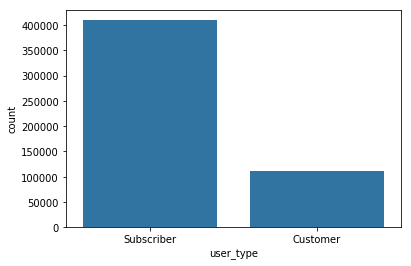

In [254]:
# Plotting the bar chart of the absolute values
blue = sns.color_palette()[0]
cat_order = df['user_type'].value_counts().index
sns.countplot(data=df, x='user_type', color = blue, order = cat_order);

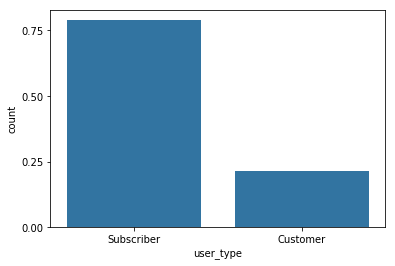

In [334]:
# Plotting the bar chart of the relative values

user_obs = df['user_type'].shape[0]
user_max = df['user_type'].value_counts().max()
user_max_prop = user_max/user_obs

user_tick_props = np.arange(0, user_max_prop, 0.25)
user_tick_labels = ['{:0.2f}'.format(l) for l in user_tick_props]

sns.countplot(data=df, x='user_type', color = blue, order = cat_order)
plt.yticks(user_tick_props*user_obs, user_tick_labels);

##### Observations

- Roughly 400,000 trips (or around three quarters of all trips) were made by the 'Subscriber' segment, compared to roughly 100,000 trips (or one quarter of all trips) made by the 'Customer' segment

Next, the `start_time` feature will be investigated.

#### The Start Time Feature

##### Plots

In [443]:
# Create a dataframe with only start times
starts = df[['start_time', 'end_time']]
starts.drop('end_time', axis=1, inplace=True) # Necessary to create a dataframe (or else it will be a series)

/Users/Aubrey/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [444]:
# Replace start time timestamp with only the hour
starts['start_time'] = starts['start_time'].dt.hour

/Users/Aubrey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


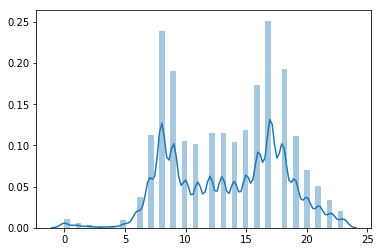

In [445]:
sns.distplot(starts);

##### Observations

- The distribution of start times is bimodal, with peaks just before and just after typical work day beginning and end times
- Roughly 25% of all trips are started in the hours before or after work

Next, the `start_station_name` feature will be investigated.

#### The Start Station Feature

##### Plots

In [316]:
# Create a dataframe of the top 10 most popular stations by trip start
top_stations = df['start_station_name'].value_counts().head(10)

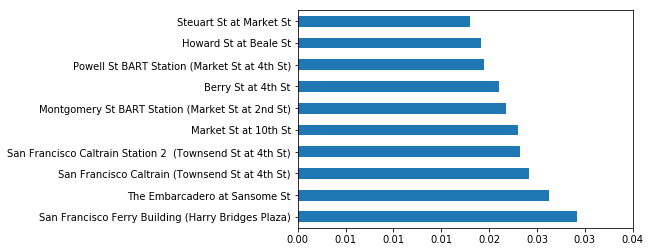

In [412]:
# Visualize by relative value

trips_obs = df.shape[0]
trips_max = df['start_station_name'].value_counts().max()
trips_max_prop = trips_max/trips_obs

trips_ticks = np.arange(0, trips_max_prop+0.01, 0.005)
trips_labels = ['{:0.2f}'.format(l) for l in trips_ticks]

top_stations.plot(kind='barh', order)
plt.xticks(trips_obs*trips_ticks, trips_labels);

In [415]:
df['start_station_name'].nunique()

272

##### Observations

- The most popular station only accounts for about 3% of all starts. This is because there are a large number of stations (272).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The distribution of the natural units of the trip duration was highly skewed to the right. Therefore, a log scale transformation was performed
- While no outlier cleansing was performed, the polished graphs will need to have limits on the axis

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- The distribution of the `duration_sec` column remains right skewed following a log scale transformation
- The timestamp columns were modified for analysis in order to only display the hours 
- For the analysis of the most popular stations, only the 10 most popular stations were evaluated

## Bivariate Exploration

#### Trip Duration & User Type

##### Plots

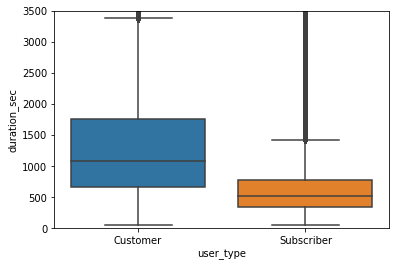

In [435]:
sns.boxplot(data=df, x='user_type', y='duration_sec')

plt.ylim(0,3500);

##### Observations

- The median Customer trip is roughly double the duration of the median Subscriber trip
- The Customer interquartile range is significantly greater than the Subscriber interquartile range

#### Trip Duration & Start Time

##### Plots

In [465]:
starts_and_dur = df[['start_time', 'duration_sec']]
starts_and_dur['start_time'] = starts_and_dur['start_time'].dt.hour
starts_and_dur2 = starts_and_dur.groupby('start_time').mean().reset_index()

/Users/Aubrey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


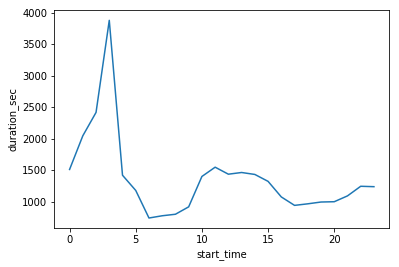

In [467]:
sns.lineplot(data=starts_and_dur2, x='start_time', y='duration_sec');

##### Observations

- Curiously, there is a peak in trip duration in the early morning
- According to the previous countplot of trip starts vs start time, this is the time when there are the least amount of trips started

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Trip durations for the 'Customer' segment are typically higher than those of the Subscriber segment, as demosntrated by the box plot
- Trip duration seems to peak for early morning uses, and fluctuates during other periods of the day. This could be explained by tired users not docking their bikes properly.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Only the features of interest were observed

## Multivariate Exploration

In [556]:
multiv = df[['start_time', 'duration_sec']]

In [557]:
multiv['day_type'] = multiv['start_time'].apply(lambda x: "weekend" if x.weekday() in [6,7] else "weekday")

/Users/Aubrey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [558]:
multiv['start_time'] = multiv['start_time'].dt.hour
multiv2 = multiv.groupby(['start_time', 'day_type']).mean().reset_index()

/Users/Aubrey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


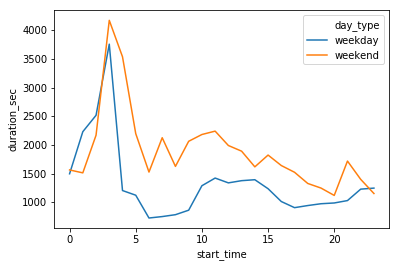

In [560]:
sns.lineplot(data=multiv2, x='start_time', y='duration_sec', hue='day_type');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The average trip duration is longer during weekends than during weekdays

### Were there any interesting or surprising interactions between features?

- This is not surprising: bikes are likely used for leisure during the weekend but for commuting during the week